In [1]:
import numpy as np
import librosa
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import os
import glob

In [2]:
audio_folder_path = r'C:./dataset/audioonly/labeled'
class_folders = next(os.walk(audio_folder_path))[1]
class_folders

['belly_pain', 'discomfort', 'hungry', 'tired']

In [3]:
dir_lab_path = [os.path.join(audio_folder_path, label) for label in class_folders]
dir_lab_path

['C:./dataset/audioonly/labeled\\belly_pain',
 'C:./dataset/audioonly/labeled\\discomfort',
 'C:./dataset/audioonly/labeled\\hungry',
 'C:./dataset/audioonly/labeled\\tired']

In [4]:
audio_path = [glob.glob(os.path.join(path, '*.wav')) for path in dir_lab_path]
for i, path in enumerate(audio_path):
    print(f" for class {i} num is {len(path)}" )

 for class 0 num is 16
 for class 1 num is 64
 for class 2 num is 410
 for class 3 num is 24


In [5]:
# # Function to pad or trim MFCCs to a fixed size
# def pad_mfcc(mfcc, max_length):
#     if mfcc.shape[1] < max_length:
#         # Pad the MFCCs
#         pad_width = max_length - mfcc.shape[1]
#         mfcc = np.pad(mfcc, pad_width=((0, 0), (0, pad_width)), mode='constant')
#     else:
#         # Trim the MFCCs
#         mfcc = mfcc[:, :max_length]
#     return mfcc

In [6]:
total_mfccs = []
max_length = 0  # Track the maximum length of MFCC arrays

for dir in audio_path:
    for path in dir:
        y, sr = librosa.load(path, sr=44100)
        mfccs = librosa.feature.mfcc(y=y, sr=sr)
        max_length = max(max_length, mfccs.shape[1])
        total_mfccs.append(mfccs)

In [11]:
total_mfccs[0]

array([[-685.7289   , -685.7289   , -685.7289   , ..., -501.09982  ,
        -491.9509   , -467.89548  ],
       [   0.       ,    0.       ,    0.       , ...,  171.53346  ,
         176.71883  ,  193.3194   ],
       [   0.       ,    0.       ,    0.       , ...,   14.398369 ,
           6.4320974,    2.1498945],
       ...,
       [   0.       ,    0.       ,    0.       , ...,  -15.558819 ,
         -14.030845 ,   -3.7407854],
       [   0.       ,    0.       ,    0.       , ...,  -14.911575 ,
         -16.06209  ,   -3.4508116],
       [   0.       ,    0.       ,    0.       , ...,   -6.6102962,
          -7.5289555,   -5.8434143]], dtype=float32)

In [14]:
init_coef = 0
min_coef = float('inf')

total_shape = [mfcc.shape for mfcc in total_mfccs]

for r, coef in total_shape:
    init_coef += coef
    if coef < min_coef:
        min_coef = coef

In [16]:
avg_coef = init_coef / len(total_mfccs)
avg_coef

579.7821011673152

In [17]:
min_coef

430

In [18]:
reshape_mfcc = []
for mfcc in total_mfccs:
    reshape_mfcc.append(mfcc[:, :430])

In [24]:
mfcc_flattened = np.array([mfcc.flatten() for mfcc in reshape_mfcc])
mfcc_flattened.shape

(514, 8600)

In [35]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
mfcc_normalized = scaler.fit_transform(mfcc_flattened)

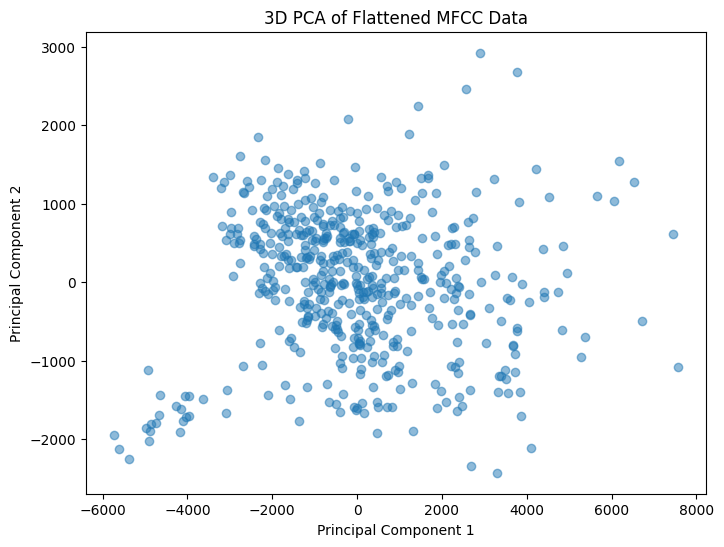

In [43]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming mfcc_flattened is your flattened MFCC data
pca = PCA(n_components=2)
mfcc_reduced = pca.fit_transform(mfcc_flattened)

# Plot the first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(mfcc_reduced[:, 0], mfcc_reduced[:, 1], alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('3D PCA of Flattened MFCC Data')
plt.show()

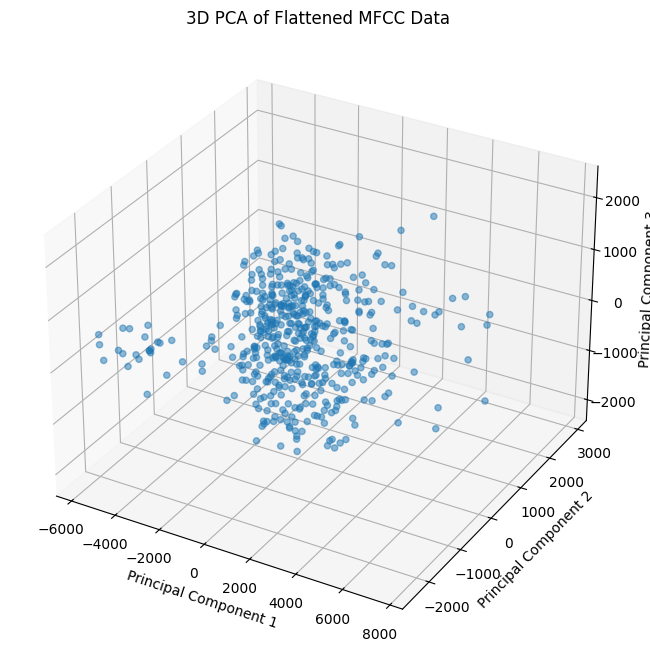

In [44]:
from mpl_toolkits.mplot3d import Axes3D

# Applying PCA to reduce to 3 components for 3D visualization
pca = PCA(n_components=3)
mfcc_reduced_3d = pca.fit_transform(mfcc_flattened)

# Plot the first three principal components in a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(mfcc_reduced_3d[:, 0], mfcc_reduced_3d[:, 1], mfcc_reduced_3d[:, 2], alpha=0.5)

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D PCA of Flattened MFCC Data')

# Display the plot
plt.show()

In [55]:
# # Define the parameter grid
# eps_values = np.arange(0.01, 0.1, 0.01)
# min_samples_values = range(2, 3)

In [56]:
# best_eps = 0
# best_min_samples = 0
# best_score = -1
# best_num_clusters = 0

In [57]:
# # Grid Search
# for eps in eps_values:
#     for min_samples in min_samples_values:
#         db = DBSCAN(eps=eps, min_samples=min_samples)
#         labels = db.fit_predict(mfcc_flattened)

#         # Count the number of clusters (excluding noise)
#         n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

#         # Evaluate the results
#         if len(set(labels)) > 1:
#             score = silhouette_score(mfcc_flattened, labels)
#             if score > best_score:
#                 best_eps = eps
#                 best_min_samples = min_samples
#                 best_score = score
#                 best_num_clusters = n_clusters

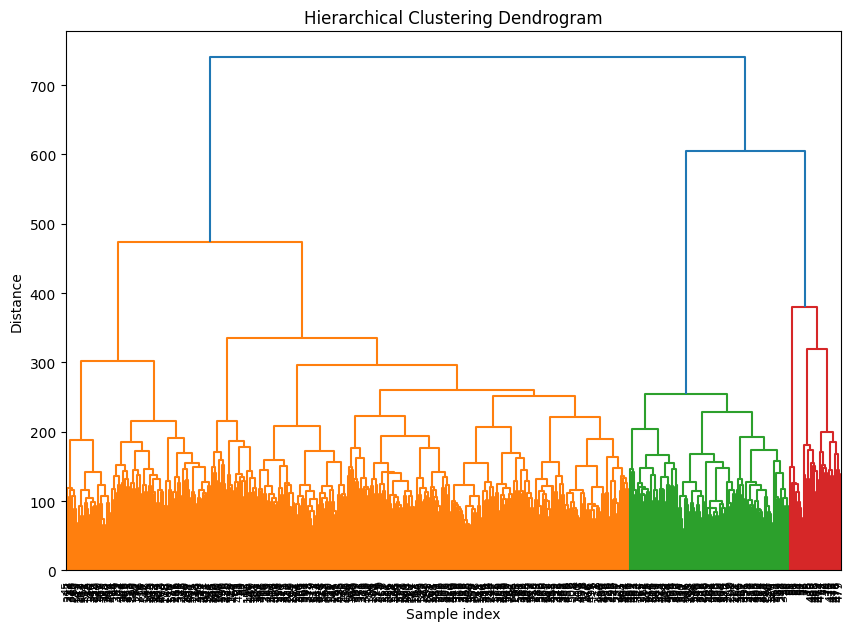

In [58]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Generate the linkage matrix using Ward's method
Z = linkage(mfcc_normalized, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
plt.title('Hierarchical Clustering Dendrogram')
dendrogram(Z, leaf_rotation=90., leaf_font_size=8.)
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

In [60]:
from scipy.cluster.hierarchy import fcluster

# Define the cutoff distance
cutoff_distance = 250

# Obtain the cluster labels for each point in the dataset
cluster_labels = fcluster(Z, cutoff_distance, criterion='distance')

# Print the cluster labels
print(len(set(cluster_labels)))

12


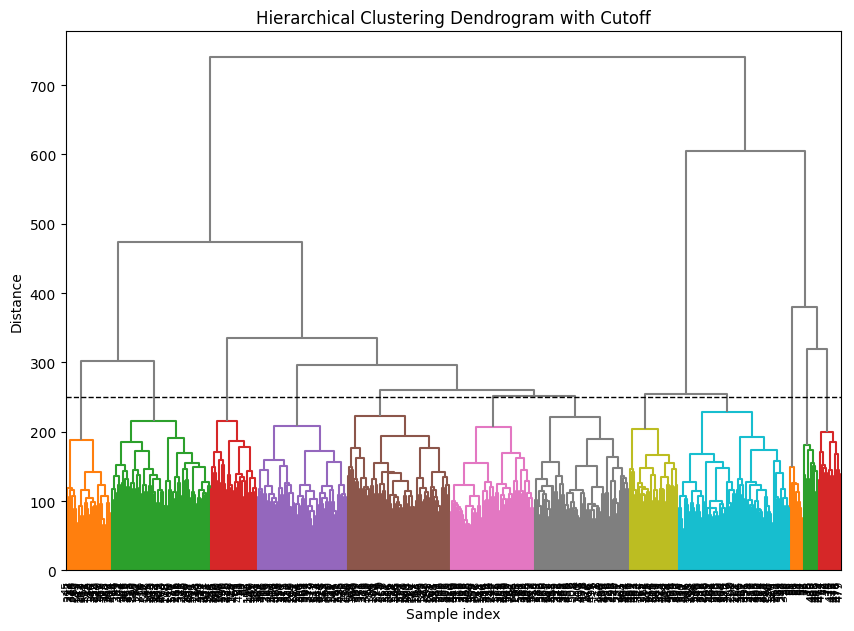

In [61]:
cutoff_distance = 250  # for example, between 200 and 300 as you mentioned

# Create the dendrogram and add a line to indicate the cutoff
plt.figure(figsize=(10, 7))
dendrogram(
    Z,
    color_threshold=cutoff_distance,  # This sets the color change at the cutoff
    above_threshold_color='grey',  # All merges above the cutoff will be this color
    leaf_rotation=90.,
    leaf_font_size=8.
)
plt.axhline(y=cutoff_distance, c='black', lw=1, linestyle='dashed')
plt.title('Hierarchical Clustering Dendrogram with Cutoff')
plt.xlabel('Sample index')
plt.ylabel('Distance')

# Show the plot with cutoff
plt.show()